**Download and Preprocess the Dataset**

In [1]:
!kaggle datasets download stanfordu/stanford-question-answering-dataset
!unzip /content/stanford-question-answering-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/stanfordu/stanford-question-answering-dataset
License(s): CC-BY-SA-4.0
 80% 7.00M/8.73M [00:01<00:00, 8.42MB/s]
100% 8.73M/8.73M [00:01<00:00, 6.11MB/s]
Archive:  /content/stanford-question-answering-dataset.zip
  inflating: dev-v1.1.json           
  inflating: train-v1.1.json         


In [2]:
!unzip /content/stanford-question-answering-dataset.zip

Archive:  /content/stanford-question-answering-dataset.zip
replace dev-v1.1.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dev-v1.1.json           
replace train-v1.1.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train-v1.1.json         


In [3]:
import json
from collections import defaultdict

def create_formatted_json(file_path, output_path):
    with open(file_path, 'r') as file:
        squad_data = json.load(file)

    formatted_data = []

    for entry in squad_data['data']:
        for paragraph in entry['paragraphs']:
            context = paragraph['context']
            for qa in paragraph['qas']:
                question = qa['question']
                answer = qa['answers'][0]['text'] if qa['answers'] else ""

                formatted_entry = {
                    "input": f"Context: {context}\nQuestion: {question}\nAnswer:",
                    "label": answer
                }
                formatted_data.append(formatted_entry)

    with open(output_path, 'w') as output_file:
        json.dump(formatted_data, output_file, indent=4)

In [4]:
create_formatted_json('/content/train-v1.1.json', 'squad_train.json')
create_formatted_json('/content/dev-v1.1.json', 'squad_dev.json')

**Clone the repo**

In [5]:
!rm -rf llama-finetuning

In [6]:
!git clone https://github.com/seungjun-green/llama-finetuning.git

Cloning into 'llama-finetuning'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 355 (delta 23), reused 49 (delta 15), pack-reused 290 (from 1)
Receiving objects: 100% (355/355), 76.48 KiB | 12.75 MiB/s, done.
Resolving deltas: 100% (162/162), done.


**Install Packages**

In [ ]:
!pip install -r /content/llama-finetuning/requirements.txt

**After restarting session run the cells from here**

In [8]:
import sys
sys.path.append("/content/llama-finetuning")
from scripts.finetune import Finetuner

In [10]:
!huggingface-cli login --token HF_KEY

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `colab` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `colab`


In [11]:
trainer = Finetuner('/content/llama-finetuning/configs/llama-3.2-1B_lora_finetune.json',
                    train_file_path="/content/squad_train.json",
                    dev_file_path="/content/squad_dev.json")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Total parameters: 1236666368
Trainable parameters: 851968


In [12]:
from data.json_data import create_dataloaders
from configs.squad_config import SquadFineTuneConfig
config = SquadFineTuneConfig('/content/llama-finetuning/configs/llama-3.2-1B_lora_finetune.json',
                    train_file_path="/content/squad_train.json",
                    dev_file_path="/content/squad_dev.json")

In [13]:
trainer.train()

Epoch 1:  10%|▉         | 501/5202 [13:14<68:36:06, 52.53s/it, Step=501, Loss=2.03]

Epoch 1, Step 501, Loss: 2.6732


Epoch 1:  19%|█▉        | 1001/5202 [26:27<61:17:35, 52.52s/it, Step=1001, Loss=1.87]

Epoch 1, Step 1001, Loss: 2.235


Epoch 1:  29%|██▉       | 1501/5202 [39:39<54:00:09, 52.53s/it, Step=1501, Loss=2.05]

Epoch 1, Step 1501, Loss: 2.0321


Epoch 1:  38%|███▊      | 2001/5202 [52:52<46:42:21, 52.53s/it, Step=2001, Loss=1.74]

Epoch 1, Step 2001, Loss: 1.9132


Epoch 1:  48%|████▊     | 2501/5202 [1:06:04<39:24:48, 52.53s/it, Step=2501, Loss=1.63]

Epoch 1, Step 2501, Loss: 1.7854


Epoch 1:  58%|█████▊    | 3001/5202 [1:19:17<32:06:36, 52.52s/it, Step=3001, Loss=1.58]

Epoch 1, Step 3001, Loss: 1.7408


Epoch 1:  67%|██████▋   | 3501/5202 [1:32:29<24:49:12, 52.53s/it, Step=3501, Loss=2.08]

Epoch 1, Step 3501, Loss: 1.6997


Epoch 1:  77%|███████▋  | 4001/5202 [1:45:42<17:31:15, 52.52s/it, Step=4001, Loss=2.15]

Epoch 1, Step 4001, Loss: 1.6508


Epoch 1:  87%|████████▋ | 4501/5202 [1:58:54<10:13:32, 52.51s/it, Step=4501, Loss=1.92]

Epoch 1, Step 4501, Loss: 1.6148


Epoch 1:  96%|█████████▌| 5001/5202 [2:12:07<2:55:57, 52.52s/it, Step=5001, Loss=2.37]

Epoch 1, Step 5001, Loss: 1.5907


Epoch 1: 100%|██████████| 5202/5202 [2:19:07<00:00,  1.60s/it, Step=5202, Loss=1.34]


Epoch 1, Step 5202, Loss: 1.5974


Epoch 2:  10%|▉         | 501/5202 [13:13<68:34:36, 52.52s/it, Step=501, Loss=1.69]

Epoch 2, Step 501, Loss: 1.581


Epoch 2:  19%|█▉        | 1001/5202 [26:26<61:17:41, 52.53s/it, Step=1001, Loss=1.69]

Epoch 2, Step 1001, Loss: 1.5393


Epoch 2:  29%|██▉       | 1501/5202 [39:38<53:59:20, 52.52s/it, Step=1501, Loss=1.9]

Epoch 2, Step 1501, Loss: 1.5403


Epoch 2:  38%|███▊      | 2001/5202 [52:50<46:41:05, 52.50s/it, Step=2001, Loss=1.37]

Epoch 2, Step 2001, Loss: 1.5574


Epoch 2:  48%|████▊     | 2501/5202 [1:06:03<39:24:37, 52.53s/it, Step=2501, Loss=1.56]

Epoch 2, Step 2501, Loss: 1.5359


Epoch 2:  58%|█████▊    | 3001/5202 [1:19:15<32:07:13, 52.54s/it, Step=3001, Loss=2.28]

Epoch 2, Step 3001, Loss: 1.5046


Epoch 2:  67%|██████▋   | 3501/5202 [1:32:28<24:48:58, 52.52s/it, Step=3501, Loss=1.25]

Epoch 2, Step 3501, Loss: 1.4739


Epoch 2:  77%|███████▋  | 4001/5202 [1:45:40<17:31:09, 52.51s/it, Step=4001, Loss=1.61]

Epoch 2, Step 4001, Loss: 1.4773


Epoch 2:  87%|████████▋ | 4501/5202 [1:58:53<10:13:34, 52.52s/it, Step=4501, Loss=2]

Epoch 2, Step 4501, Loss: 1.4583


Epoch 2:  96%|█████████▌| 5001/5202 [2:12:05<2:55:57, 52.52s/it, Step=5001, Loss=2.23]

Epoch 2, Step 5001, Loss: 1.4513


Epoch 2: 100%|██████████| 5202/5202 [2:19:05<00:00,  1.60s/it, Step=5202, Loss=0.691]


Epoch 2, Step 5202, Loss: 1.4651


Epoch 3:  10%|▉         | 501/5202 [13:13<68:34:24, 52.51s/it, Step=501, Loss=0.958]

Epoch 3, Step 501, Loss: 1.4464


Epoch 3:  19%|█▉        | 1001/5202 [26:26<61:16:29, 52.51s/it, Step=1001, Loss=0.823]

Epoch 3, Step 1001, Loss: 1.4601


Epoch 3:  29%|██▉       | 1501/5202 [39:38<53:59:05, 52.51s/it, Step=1501, Loss=0.656]

Epoch 3, Step 1501, Loss: 1.4429


Epoch 3:  38%|███▊      | 2001/5202 [52:51<46:41:54, 52.52s/it, Step=2001, Loss=0.998]

Epoch 3, Step 2001, Loss: 1.4227


Epoch 3:  48%|████▊     | 2501/5202 [1:06:03<39:24:11, 52.52s/it, Step=2501, Loss=0.674]

Epoch 3, Step 2501, Loss: 1.4426


Epoch 3:  58%|█████▊    | 3001/5202 [1:19:16<32:06:18, 52.51s/it, Step=3001, Loss=1.06]

Epoch 3, Step 3001, Loss: 1.417


Epoch 3:  67%|██████▋   | 3501/5202 [1:32:29<24:48:38, 52.51s/it, Step=3501, Loss=0.874]

Epoch 3, Step 3501, Loss: 1.4153


Epoch 3:  77%|███████▋  | 4001/5202 [1:45:41<17:30:55, 52.50s/it, Step=4001, Loss=1.87]

Epoch 3, Step 4001, Loss: 1.4169


Epoch 3:  87%|████████▋ | 4501/5202 [1:58:54<10:13:29, 52.51s/it, Step=4501, Loss=0.682]

Epoch 3, Step 4501, Loss: 1.4036


Epoch 3:  96%|█████████▌| 5001/5202 [2:12:06<2:55:56, 52.52s/it, Step=5001, Loss=0.487]

Epoch 3, Step 5001, Loss: 1.4035


Epoch 3: 100%|██████████| 5202/5202 [2:19:06<00:00,  1.60s/it, Step=5202, Loss=0.724]

Epoch 3, Step 5202, Loss: 1.417


In [26]:
import matplotlib.pyplot as plt

def plot_losses(train_losses, val_losses, log_step):
    plt.figure(figsize=(12, 6))
    train_steps = list(range(1, len(train_losses) + 1))
    val_steps = [(i + 1) * log_step for i in range(len(val_losses) - 1)]
    val_steps.append(len(train_losses))

    plt.plot(train_steps, train_losses, label="Training Loss", color='blue', linewidth=0.5)
    plt.plot(val_steps, val_losses, label="Validation Loss", color='red', marker='o', linestyle='--')

    plt.xlabel("Training Steps")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss Over Time")
    plt.legend()
    plt.grid(True)

    plt.show()

In [21]:
train_lossses_p = []
for l in trainer.train_losses:
  train_lossses_p.append(l.item())

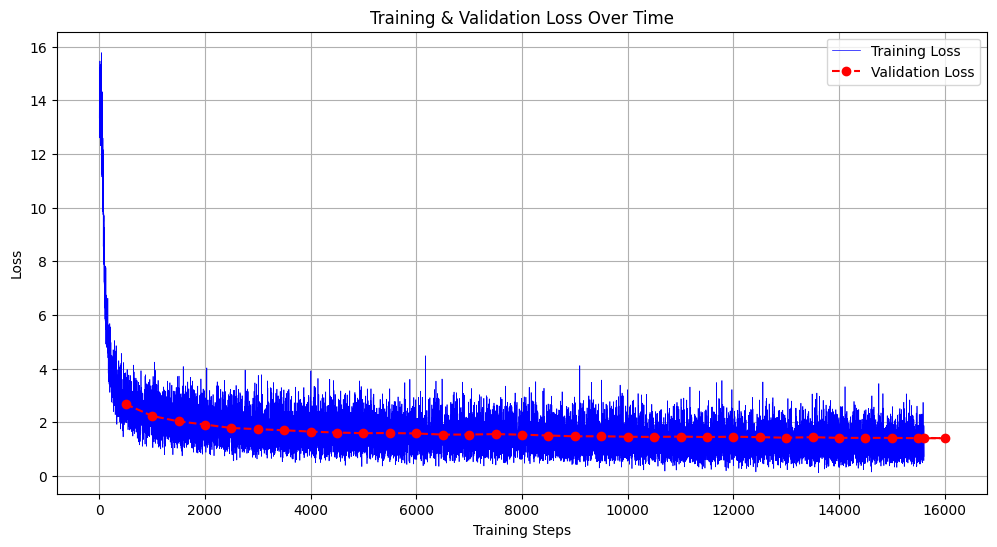

In [27]:
plot_losses(train_lossses_p, trainer.val_losses, trainer.log)